In [13]:
import pandas as pd

example_csv = "https://data.ca.gov/dataset/4a9a896a-e64e-48c2-bb35-5589f80e7c52/resource/5a3f496d-04be-4405-aea0-e83e26076efc/download/covid19dashboard.csv"
data = pd.read_csv(example_csv)
data.describe()

,Latitude,Longitude,TotalConfirmed,TotalDeaths,DistinctPatientsTested,NewInTheLast14Days
count,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000
mean,36.375825,-119.569829,1640.245861,5.785291,92.362038,31.447797
std,2.230665,2.217752,1258.190961,7.763616,149.495851,96.609501
min,32.572602,-124.167030,0.000000,0.000000,0.000000,0.000000
25%,34.728857,-121.157830,654.000000,0.000000,5.000000,0.000000
50%,36.177361,-120.278640,1490.000000,2.000000,39.000000,2.000000
75%,37.955474,-117.914730,2488.000000,8.000000,112.000000,16.000000
max,41.782681,-114.619050,5627.000000,30.000000,3158.000000,1457.000000


In [14]:
from lib import Describe

In [15]:
#NBVAL_CHECK_OUTPUT
Describe(data)

,Latitude,Longitude,TotalConfirmed,TotalDeaths,DistinctPatientsTested,NewInTheLast14Days
count,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000,44940.000000
mean,36.375825,-119.569829,1640.245861,5.785291,92.362038,31.447797
std,2.230665,2.217752,1258.190961,7.763616,149.495851,96.609501
min,32.572602,-124.167030,0.000000,0.000000,0.000000,0.000000
25%,34.728857,-121.157830,654.000000,0.000000,5.000000,0.000000
50%,36.177361,-120.278640,1490.000000,2.000000,39.000000,2.000000
75%,37.955474,-117.914730,2488.000000,8.000000,112.000000,16.000000
max,41.782681,-114.619050,5627.000000,30.000000,3158.000000,1457.000000


In [16]:
#data.median()


In [17]:
from lib import get_median

In [18]:
#NBVAL_CHECK_OUTPUT
get_median(data['TotalConfirmed'])
get_median(data['TotalDeaths'])
get_median(data['DistinctPatientsTested'])
get_median(data['NewInTheLast14Days'])

2.0

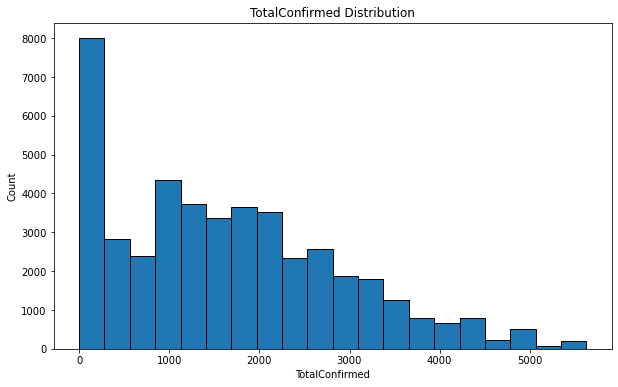

In [19]:
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
general_df = pd.read_csv(example_csv)
plt.figure(figsize=(10, 6))
plt.hist(general_df["TotalConfirmed"], bins=20, edgecolor="black")
plt.title("TotalConfirmed Distribution")
plt.xlabel("TotalConfirmed")
plt.ylabel("Count")
plt.show() 

In [20]:
from lib import PlotHistOfTotalConfirmed

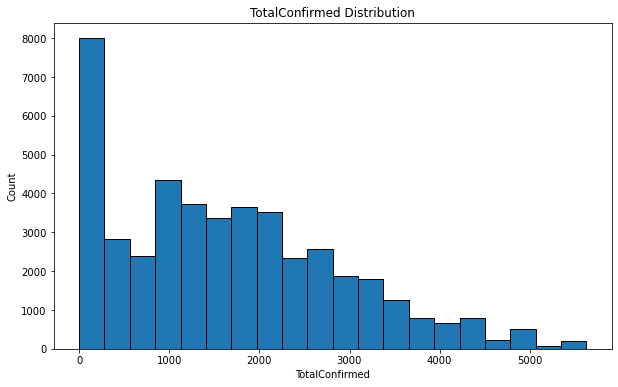

In [21]:
#NBVAL_CHECK_OUTPUT
PlotHistOfTotalConfirmed(example_csv)

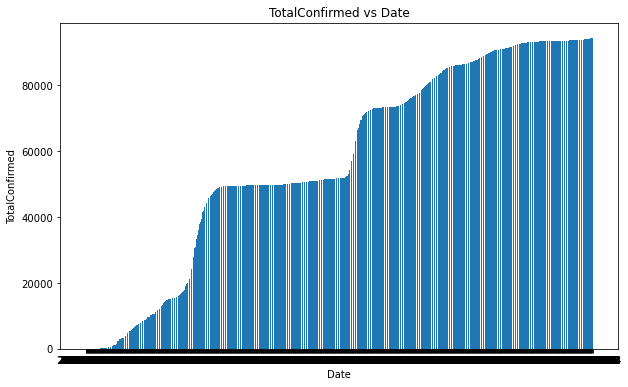

In [22]:
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option("display.max_columns", None)
general_df = pd.read_csv(example_csv)
plt.figure(figsize=(10, 6))
a = []
for i in range(len(general_df.index)):
    a.append(datetime.strptime(general_df["Date"][i], '%Y-%m-%d').date())
general_df["DateInt"] = a
#print(type(general_df["Date"][0]))
df = general_df.groupby("Date").sum()
#print(df)
df2 =df.reset_index()
plt.bar(df2["Date"], df2["TotalConfirmed"])
plt.title("TotalConfirmed vs Date")
plt.xlabel("Date")
plt.ylabel("TotalConfirmed")
plt.show() 

In [23]:
from lib import PlotHistTotalConfirmedVsDate

In [25]:
#NBVAL_CHECK_OUTPUT
PlotHistTotalConfirmedVsDate(example_csv)

ValueError: Length of values (44870) does not match length of index (44940)

<Figure size 720x432 with 0 Axes>

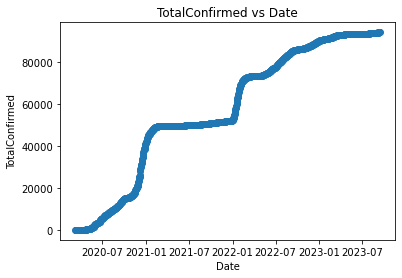

In [ ]:
plt.scatter(df2["Date"], df2["TotalConfirmed"])
plt.title("TotalConfirmed vs Date")
plt.xlabel("Date")
plt.ylabel("TotalConfirmed")
plt.show() 

In [ ]:
from lib import PlotScatter

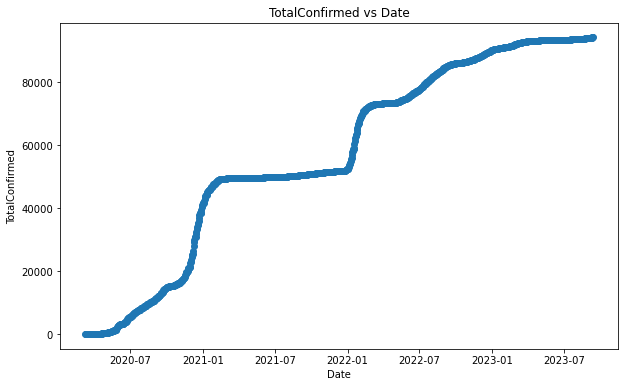

In [ ]:
#NBVAL_CHECK_OUTPUT
PlotScatter(example_csv)

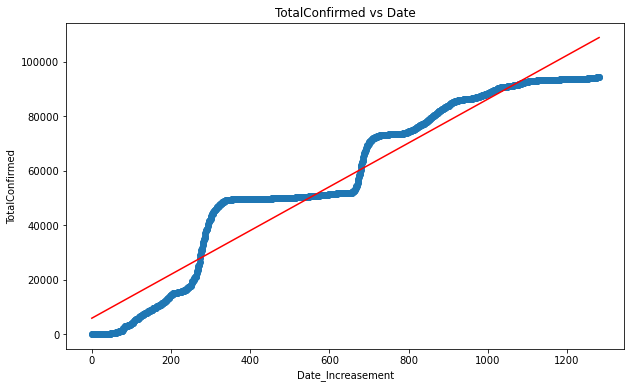

In [ ]:
from sklearn.linear_model import LinearRegression
pd.set_option("display.max_columns", None)
general_df = pd.read_csv(example_csv)
plt.figure(figsize=(10, 6))
df = general_df.groupby("Date").sum()
df2 =df.reset_index()
x = []
a = 0
for i in range(len(df2.index)):
  x.append(a)
  a = a + 1
df2["date_index"] = x
lr = LinearRegression()  # create object for the class
lr.fit(df2["date_index"].values.reshape(-1, 1), df2["TotalConfirmed"])  # perform linear regression
Y_pred = lr.predict(df2["date_index"].values.reshape(-1, 1))  # make predictions
plt.scatter(df2["date_index"].values.reshape(-1, 1), df2["TotalConfirmed"])
plt.plot(df2["date_index"].values.reshape(-1, 1), Y_pred, color='red')
plt.title("TotalConfirmed vs Date")
plt.xlabel("Date_Increasement")
plt.ylabel("TotalConfirmed")
plt.show()

In [ ]:
from lib import LROfTotalConfirmedVsDate

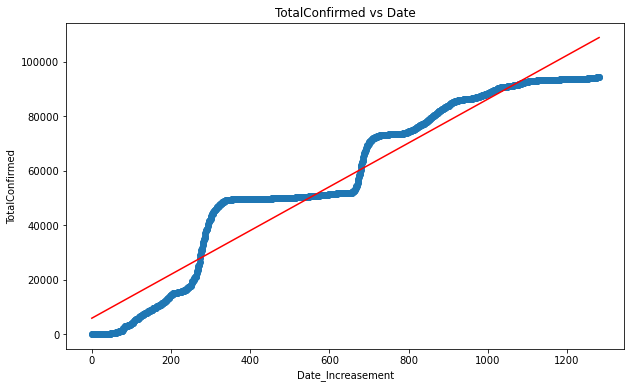

In [ ]:
#NBVAL_CHECK_OUTPUT
LROfTotalConfirmedVsDate(example_csv)